# Conociendo Pandas &#128060;

## Física Computacional I: Ciencia de Datos

### Universidad del Quindío / Ph.D. Santiago Echeverri Arteaga

\begin{equation}
    x' = x\cos(\phi) - y\sin(\phi)
\end{equation}
\begin{equation}
    y' = x\sin(\phi) + y\cos(\phi)
\end{equation}

### Importar módulos

In [2]:
import pandas as pd
import numpy as np
import datetime #Para manejo de fechas
import pytz #Para zonas horarias
import json #Para archivos json
from pandas.io.json import json_normalize #Para normalizar archivos json
from pandas.io.pytables import HDFStore #Para manejar archivos h5

In [ ]:
!pip install tables #En caso de ser requerido al importar el archivo h5

### Series

In [3]:
sdata = {'Bogota':3500, 'Armenia':1450, 'Ibague':2000, 'Cartagena':0, 'San Andrés':np.nan}
serie1 = pd.Series(sdata)
print("\t\tMostrando la serie")
display(serie1)
print("\t\tMostrando valores únicos")
display(serie1.unique())
print("\t\tMostrando conteo de valores")
display(serie1.value_counts())
print("\t\tMostrando datos filtrados")
display(serie1[serie1>0])
print("\t\tMostrando filtro")
display(serie1>0)
print("\t\tMostrando nulos")
display(serie1.isnull())
print("\t\tMostrando no nulos")
display(serie1.notnull())

		Mostrando la serie


Bogota        3500.0
Armenia       1450.0
Ibague        2000.0
Cartagena        0.0
San Andrés       NaN
dtype: float64

		Mostrando valores únicos


array([3500., 1450., 2000.,    0.,   nan])

		Mostrando conteo de valores


3500.0    1
1450.0    1
2000.0    1
0.0       1
dtype: int64

		Mostrando datos filtrados


Bogota     3500.0
Armenia    1450.0
Ibague     2000.0
dtype: float64

		Mostrando filtro


Bogota         True
Armenia        True
Ibague         True
Cartagena     False
San Andrés    False
dtype: bool

		Mostrando nulos


Bogota        False
Armenia       False
Ibague        False
Cartagena     False
San Andrés     True
dtype: bool

		Mostrando no nulos


Bogota         True
Armenia        True
Ibague         True
Cartagena      True
San Andrés    False
dtype: bool

In [5]:
#sdata2 = {'Bogota':2500, 'Armenia':2000, 'Cartagena':3000, 'San Andrés':15000, 'Amazonas':1500}
sdata2 = [2500,2000,3000,15000,1500]
states = ['Bogota', 'Armenia', 'Cartagena', 'San Andrés', 'Amazonas']
serie2 = pd.Series(sdata2, index=states)
serie1+serie2

Amazonas         NaN
Armenia       3450.0
Bogota        6000.0
Cartagena     3000.0
Ibague           NaN
San Andrés       NaN
dtype: float64

### DataFrames

In [6]:
asignacion = ['Alice', 'Bob', 'Charles', 'Dana', 'Eli', 'Frank']
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data, index=asignacion)
print('\t FRAME')
display(frame)
print('\t COLUMNS')
display(frame.columns)
print('\t INDEX')
display(frame.index)
print('\t VALUES')
display(frame.values)
print('\t UNA SOLA COLUMNA CON [ ]')
display(frame['year'])
print('\t UNA SOLA COLUMNA CON [[ ]]')
display(frame[['year']])
print('\t LOC')
display(frame.loc['Dana'])
print('\t ILOC')
display(frame.iloc[3])

	 FRAME


,state,year,pop
Alice,Ohio,2000,1.5
Bob,Ohio,2001,1.7
Charles,Ohio,2002,3.6
Dana,Nevada,2001,2.4
Eli,Nevada,2002,2.9
Frank,Nevada,2003,3.2


	 COLUMNS


Index(['state', 'year', 'pop'], dtype='object')

	 INDEX


Index(['Alice', 'Bob', 'Charles', 'Dana', 'Eli', 'Frank'], dtype='object')

	 VALUES


array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

	 UNA SOLA COLUMNA CON [ ]


Alice      2000
Bob        2001
Charles    2002
Dana       2001
Eli        2002
Frank      2003
Name: year, dtype: int64

	 UNA SOLA COLUMNA CON [[ ]]


,year
Alice,2000
Bob,2001
Charles,2002
Dana,2001
Eli,2002
Frank,2003


	 LOC


state    Nevada
year       2001
pop         2.4
Name: Dana, dtype: object

	 ILOC


state    Nevada
year       2001
pop         2.4
Name: Dana, dtype: object

In [7]:
df2 = pd.DataFrame({'Nevada':{2001:2.4, 2002:2.9},
              'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}})
df2

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [8]:
print('\t ISIN')
display(df2.isin([2.4,1.5]))
print('\t df2 < 2')
display(df2<2)
print('\t .T')
display(df2.T)
print('\t IDXMIN')
display(df2.idxmin())
print('\t IDXMAX')
display(df2.idxmax())
print('\t ¿ES ÚNICO EL INDEX?')
display(df2.index.is_unique)
print('\t INDEX')
display(df2.index)

	 ISIN


,Nevada,Ohio
2001,True,False
2002,False,False
2000,False,True


	 df2 < 2


,Nevada,Ohio
2001,False,True
2002,False,False
2000,False,True


	 .T


,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


	 IDXMIN


Nevada    2001
Ohio      2000
dtype: int64

	 IDXMAX


Nevada    2002
Ohio      2002
dtype: int64

	 ¿ES ÚNICO EL INDEX?


True

	 INDEX


Int64Index([2001, 2002, 2000], dtype='int64')

In [9]:
df2.rename({2000:0,2001:1,2002:2})

,Nevada,Ohio
1,2.4,1.7
2,2.9,3.6
0,NaN,1.5


In [10]:
ser = pd.Series([2,5,7,4], index=['one','two','three','four'])
display(ser)
print('\n\tREINDEX\n')
display(ser.reindex(['three','four','five','one']))

one      2
two      5
three    7
four     4
dtype: int64


	REINDEX



three    7.0
four     4.0
five     NaN
one      2.0
dtype: float64

### Drop Values

In [51]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)), index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
display(frame)
display(frame.drop(['blue','yellow']))
display(frame.drop(['pen','pencil'],axis=1))

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


,ball,pen,pencil,paper
red,0,1,2,3
white,12,13,14,15


,ball,paper
red,0,3
blue,4,7
yellow,8,11
white,12,15


In [53]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),  index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
print('\t\nFRAME')
display(frame)
ser = pd.Series(np.arange(4), index=['ball','pen','pencil','paper'])
print('\t\nSERIE')
display(ser)
print('\t\nRESTA')
display(frame - ser)
ser['mug'] = 9
print('\t\nNUEVA SERIE')
display(ser)
print('\t\nRESTA')
display(frame - ser)

	
FRAME


,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


	
SERIE


ball      0
pen       1
pencil    2
paper     3
dtype: int64

	
RESTA


,ball,pen,pencil,paper
red,0,0,0,0
blue,4,4,4,4
yellow,8,8,8,8
white,12,12,12,12


	
NUEVA SERIE


ball      0
pen       1
pencil    2
paper     3
mug       9
dtype: int64

	
RESTA


,ball,mug,paper,pen,pencil
red,0,NaN,0,0,0
blue,4,NaN,4,4,4
yellow,8,NaN,8,8,8
white,12,NaN,12,12,12


### Operaciones

In [54]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)), index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
display(frame)
#print('\n\tSQRT\n')
#display(np.sqrt(frame))
f = lambda x: x.max() - x.min()
print('\n\t¿Qué es esta salida?\n')
display(frame.apply(f))
print('\n\t¿Qué es esta salida?\n')
display(frame.apply(f, axis=1))

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15



	¿Qué es esta salida?



ball      12
pen       12
pencil    12
paper     12
dtype: int64


	¿Qué es esta salida?



red       3
blue      3
yellow    3
white     3
dtype: int64

In [55]:
def f(x):
            return pd.Series([x.min(), x.max(), x.sum(), x.mean(), x.std()], index=['min','max', 'sum', 'mean', 'std'])
frame.apply(f)

,ball,pen,pencil,paper
min,0.000000,1.000000,2.000000,3.000000
max,12.000000,13.000000,14.000000,15.000000
sum,24.000000,28.000000,32.000000,36.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978


In [4]:
frame.std()

ball      5.163978
pen       5.163978
pencil    5.163978
paper     5.163978
dtype: float64

In [5]:
frame.describe()

,ball,pen,pencil,paper
count,4.000000,4.000000,4.000000,4.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978
min,0.000000,1.000000,2.000000,3.000000
25%,3.000000,4.000000,5.000000,6.000000
50%,6.000000,7.000000,8.000000,9.000000
75%,9.000000,10.000000,11.000000,12.000000
max,12.000000,13.000000,14.000000,15.000000


In [6]:
frame.sort_index(axis=1) #axis=1

,ball,paper,pen,pencil
red,0,3,1,2
blue,4,7,5,6
yellow,8,11,9,10
white,12,15,13,14


In [22]:
frame.sort_values(by='paper', ascending=False)

,ball,pen,pencil,paper
white,12,13,14,15
yellow,8,9,10,11
blue,4,5,6,7
red,0,1,2,3


### Correlación y Covarianza

In [23]:
seq2 = pd.Series([0.3,0.4,0.3,0.4,0.5,0.4,0.3,0.2],['2006','2007','2008','2009','2010','2011','2012','2013'])
seq = pd.Series([0.1,0.2,0.3,0.4,0.4,0.3,0.2,0.1],['2006','2007','2008','2009','2010','2011','2012','2013'])
print("Corr: {}, Cov: {}".format(seq.corr(seq2),seq.cov(seq2))) 

Corr: 0.7745966692414834, Cov: 0.008571428571428572


In [10]:
import pandas as pd
frame2 = pd.DataFrame(np.random.random((8,8)),index=['2006','2007','2008','2009','2010','2011','2012','2013'],
                     columns=['A','B','C','D','E','F','G','H'])
frame2

,A,B,C,D,E,F,G,H
2006,0.808149,0.282473,0.192130,0.135010,0.772843,0.559278,0.898204,0.806184
2007,0.128595,0.864542,0.891852,0.596122,0.165828,0.761180,0.869515,0.396380
2008,0.905347,0.107169,0.453822,0.250043,0.721275,0.010174,0.203355,0.553834
2009,0.411961,0.843703,0.426739,0.733667,0.480800,0.469269,0.820285,0.970677
2010,0.775715,0.945401,0.417743,0.554949,0.486810,0.828162,0.433699,0.900660
2011,0.864001,0.558360,0.464333,0.543117,0.815406,0.036776,0.305593,0.275086
2012,0.759298,0.741793,0.031029,0.746692,0.092814,0.900959,0.465008,0.186349
2013,0.131566,0.753489,0.402838,0.737221,0.499921,0.826076,0.890070,0.800681


In [57]:
frame2.corr()

,A,B,C,D,E,F,G,H
A,1.000000,0.956657,0.213223,-0.113276,-0.184025,-0.221773,-0.443886,-0.189591
B,0.956657,1.000000,0.107659,-0.082821,-0.233647,-0.377897,-0.550887,-0.178792
C,0.213223,0.107659,1.000000,-0.018712,0.065158,-0.152371,-0.219178,-0.519909
D,-0.113276,-0.082821,-0.018712,1.000000,-0.829375,-0.365251,-0.393036,-0.217703
E,-0.184025,-0.233647,0.065158,-0.829375,1.000000,0.297735,0.312898,0.170118
F,-0.221773,-0.377897,-0.152371,-0.365251,0.297735,1.000000,0.409135,0.015789
G,-0.443886,-0.550887,-0.219178,-0.393036,0.312898,0.409135,1.000000,0.467447
H,-0.189591,-0.178792,-0.519909,-0.217703,0.170118,0.015789,0.467447,1.000000


In [58]:
frame2.cov()

,A,B,C,D,E,F,G,H
A,0.125474,0.122907,0.023160,-0.010805,-0.020007,-0.019568,-0.054850,-0.020919
B,0.122907,0.131548,0.011973,-0.008089,-0.026010,-0.034141,-0.069700,-0.020200
C,0.023160,0.011973,0.094027,-0.001545,0.006132,-0.011638,-0.023445,-0.049660
D,-0.010805,-0.008089,-0.001545,0.072508,-0.068545,-0.024498,-0.036919,-0.018260
E,-0.020007,-0.026010,0.006132,-0.068545,0.094203,0.022762,0.033501,0.016264
F,-0.019568,-0.034141,-0.011638,-0.024498,0.022762,0.062045,0.035550,0.001225
G,-0.054850,-0.069700,-0.023445,-0.036919,0.033501,0.035550,0.121688,0.050794
H,-0.020919,-0.020200,-0.049660,-0.018260,0.016264,0.001225,0.050794,0.097030


In [28]:
frame2.corrwith(seq,axis=0)

A    0.553996
B   -0.406905
C   -0.122863
D   -0.139488
E    0.277068
F    0.091157
G    0.629156
H   -0.117605
dtype: float64

### Quitar nulos

In [11]:

null = pd.DataFrame(np.nan,index=['2014'],columns=['A','B','C','D','E','F','G','H'])
filtered = frame2[frame2>0.5]
data = pd.concat([filtered,null])
data['J']=np.nan
data

,A,B,C,D,E,F,G,H,J
2006,0.808149,NaN,NaN,NaN,0.772843,0.559278,0.898204,0.806184,NaN
2007,NaN,0.864542,0.891852,0.596122,NaN,0.761180,0.869515,NaN,NaN
2008,0.905347,NaN,NaN,NaN,0.721275,NaN,NaN,0.553834,NaN
2009,NaN,0.843703,NaN,0.733667,NaN,NaN,0.820285,0.970677,NaN
2010,0.775715,0.945401,NaN,0.554949,NaN,0.828162,NaN,0.900660,NaN
2011,0.864001,0.558360,NaN,0.543117,0.815406,NaN,NaN,NaN,NaN
2012,0.759298,0.741793,NaN,0.746692,NaN,0.900959,NaN,NaN,NaN
2013,NaN,0.753489,NaN,0.737221,NaN,0.826076,0.890070,0.800681,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.notnull()

,A,B,C,D,E,F,G,H,J
2006,True,False,False,False,True,True,True,True,False
2007,False,True,True,True,False,True,True,False,False
2008,True,False,False,False,True,False,False,True,False
2009,False,True,False,True,False,False,True,True,False
2010,True,True,False,True,False,True,False,True,False
2011,True,True,False,True,True,False,False,False,False
2012,True,True,False,True,False,True,False,False,False
2013,False,True,False,True,False,True,True,True,False
2014,False,False,False,False,False,False,False,False,False


In [16]:
data.dropna()

,A,B,C,D,E,F,G,H,J


In [22]:
data.dropna(how='all',axis=1)

,A,B,C,D,E,F,G,H
2006,0.808149,NaN,NaN,NaN,0.772843,0.559278,0.898204,0.806184
2007,NaN,0.864542,0.891852,0.596122,NaN,0.761180,0.869515,NaN
2008,0.905347,NaN,NaN,NaN,0.721275,NaN,NaN,0.553834
2009,NaN,0.843703,NaN,0.733667,NaN,NaN,0.820285,0.970677
2010,0.775715,0.945401,NaN,0.554949,NaN,0.828162,NaN,0.900660
2011,0.864001,0.558360,NaN,0.543117,0.815406,NaN,NaN,NaN
2012,0.759298,0.741793,NaN,0.746692,NaN,0.900959,NaN,NaN
2013,NaN,0.753489,NaN,0.737221,NaN,0.826076,0.890070,0.800681
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.dropna(thresh=4, axis=1)

,A,B,D,F,G,H
2006,0.808149,NaN,NaN,0.559278,0.898204,0.806184
2007,NaN,0.864542,0.596122,0.761180,0.869515,NaN
2008,0.905347,NaN,NaN,NaN,NaN,0.553834
2009,NaN,0.843703,0.733667,NaN,0.820285,0.970677
2010,0.775715,0.945401,0.554949,0.828162,NaN,0.900660
2011,0.864001,0.558360,0.543117,NaN,NaN,NaN
2012,0.759298,0.741793,0.746692,0.900959,NaN,NaN
2013,NaN,0.753489,0.737221,0.826076,0.890070,0.800681
2014,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.fillna(data.mean(),inplace=True)#inplace=True

In [40]:
data

,A,B,C,D,E,F,G,H,J
2006,NaN,0.887680,NaN,0.581548,NaN,0.704597,NaN,0.971171,NaN
2007,NaN,0.977978,0.578115,0.616650,0.605304,NaN,NaN,0.686119,NaN
2008,0.739385,NaN,NaN,NaN,0.851445,0.639806,0.844956,NaN,NaN
2009,0.535905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.756621,NaN,NaN,NaN,0.856508,0.930800,0.973992,0.771106,NaN
2011,0.606664,0.929861,0.772669,NaN,NaN,0.749790,0.722310,0.813885,NaN
2012,NaN,0.768025,NaN,0.888197,0.959634,NaN,0.566322,NaN,NaN
2013,0.658769,NaN,NaN,NaN,NaN,0.817682,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data.fillna({'J':0})

,A,B,C,D,E,F,G,H,J
2006,NaN,0.887680,NaN,0.581548,NaN,0.704597,NaN,0.971171,0.0
2007,NaN,0.977978,0.578115,0.616650,0.605304,NaN,NaN,0.686119,0.0
2008,0.739385,NaN,NaN,NaN,0.851445,0.639806,0.844956,NaN,0.0
2009,0.535905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010,0.756621,NaN,NaN,NaN,0.856508,0.930800,0.973992,0.771106,0.0
2011,0.606664,0.929861,0.772669,NaN,NaN,0.749790,0.722310,0.813885,0.0
2012,NaN,0.768025,NaN,0.888197,0.959634,NaN,0.566322,NaN,0.0
2013,0.658769,NaN,NaN,NaN,NaN,0.817682,NaN,NaN,0.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Removiendo duplicados

In [25]:
rang = pd.DataFrame([np.arange(8)],index=['2014'],columns=['A','B','C','D','E','F','G','H'])
rang2 = pd.DataFrame([np.arange(10,18)],index=['2014'],columns=['A','B','C','D','E','F','G','H'])
rang3 = pd.DataFrame([[0,3,2,3,4,5,6,4]],index=['2014'],columns=['A','B','C','D','E','F','G','H'])
data_dup = pd.concat([frame2,rang,rang,rang2,rang3])
data_dup

,A,B,C,D,E,F,G,H
2006,0.808149,0.282473,0.192130,0.135010,0.772843,0.559278,0.898204,0.806184
2007,0.128595,0.864542,0.891852,0.596122,0.165828,0.761180,0.869515,0.396380
2008,0.905347,0.107169,0.453822,0.250043,0.721275,0.010174,0.203355,0.553834
2009,0.411961,0.843703,0.426739,0.733667,0.480800,0.469269,0.820285,0.970677
2010,0.775715,0.945401,0.417743,0.554949,0.486810,0.828162,0.433699,0.900660
2011,0.864001,0.558360,0.464333,0.543117,0.815406,0.036776,0.305593,0.275086
2012,0.759298,0.741793,0.031029,0.746692,0.092814,0.900959,0.465008,0.186349
2013,0.131566,0.753489,0.402838,0.737221,0.499921,0.826076,0.890070,0.800681
2014,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
2014,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000


In [50]:
data_dup.drop_duplicates(['A','B'])

,A,B,C,D,E,F,G,H
2006,0.147161,0.887680,0.207991,0.581548,0.255853,0.704597,0.087684,0.971171
2007,0.190384,0.977978,0.578115,0.616650,0.605304,0.172708,0.181893,0.686119
2008,0.739385,0.117552,0.364025,0.068145,0.851445,0.639806,0.844956,0.402533
2009,0.535905,0.260748,0.107201,0.443422,0.369928,0.357065,0.376918,0.167597
2010,0.756621,0.021435,0.157349,0.471948,0.856508,0.930800,0.973992,0.771106
2011,0.606664,0.929861,0.772669,0.096365,0.349203,0.749790,0.722310,0.813885
2012,0.162700,0.768025,0.416280,0.888197,0.959634,0.011787,0.566322,0.081622
2013,0.658769,0.109151,0.259241,0.116208,0.427793,0.817682,0.440344,0.331212
2014,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
2014,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000


In [46]:
data_dup.drop_duplicates(['A'],keep='last')

,A,B,C,D,E,F,G,H
2006,0.147161,0.887680,0.207991,0.581548,0.255853,0.704597,0.087684,0.971171
2007,0.190384,0.977978,0.578115,0.616650,0.605304,0.172708,0.181893,0.686119
2008,0.739385,0.117552,0.364025,0.068145,0.851445,0.639806,0.844956,0.402533
2009,0.535905,0.260748,0.107201,0.443422,0.369928,0.357065,0.376918,0.167597
2010,0.756621,0.021435,0.157349,0.471948,0.856508,0.930800,0.973992,0.771106
2011,0.606664,0.929861,0.772669,0.096365,0.349203,0.749790,0.722310,0.813885
2012,0.162700,0.768025,0.416280,0.888197,0.959634,0.011787,0.566322,0.081622
2013,0.658769,0.109151,0.259241,0.116208,0.427793,0.817682,0.440344,0.331212
2014,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000
2014,0.000000,3.000000,2.000000,3.000000,4.000000,5.000000,6.000000,4.000000


### Reemplazando

In [51]:
frame

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [52]:
frame.replace({0:1000,5:1500,11:1100})

,ball,pen,pencil,paper
red,1000,1,2,3
blue,4,1500,6,7
yellow,8,9,10,1100
white,12,13,14,15


In [54]:
frame >10

,ball,pen,pencil,paper
red,False,False,False,False
blue,False,False,False,False
yellow,False,False,False,True
white,True,True,True,True


In [59]:
frame.mask((frame <13) & (frame > 5),np.nan)

,ball,pen,pencil,paper
red,0.0,1.0,2.0,3.0
blue,4.0,5.0,NaN,NaN
yellow,NaN,NaN,NaN,NaN
white,NaN,13.0,14.0,15.0


### Indexación Jerárquica

In [7]:
mser = pd.Series(np.random.rand(8), index=[['white','white','white','blue','blue','red','red',
'red'], ['up','down','right','up','down','up','down','left']])
mser

white  up       0.421298
       down     0.524285
       right    0.073400
blue   up       0.458071
       down     0.966042
red    up       0.907404
       down     0.911341
       left     0.290063
dtype: float64

In [8]:
mser['white']

up       0.421298
down     0.524285
right    0.073400
dtype: float64

In [9]:
mser['white','up']

0.4212977048149862

In [10]:
mser[:,'up']

white    0.421298
blue     0.458071
red      0.907404
dtype: float64

In [11]:
mser.unstack()

,down,left,right,up
blue,0.966042,NaN,NaN,0.458071
red,0.911341,0.290063,NaN,0.907404
white,0.524285,NaN,0.0734,0.421298


In [12]:
mframe = pd.DataFrame(np.random.randn(16).reshape(4,4),index=[['white','white','red','red'], ['up','down','up','down']], columns=[['pen','pen','paper','paper'],[1,2,1,2]])
mframe

pen               paper          
                   1         2         1         2
white up   -1.160555 -2.178635  0.074227  1.030030
      down -0.768514  0.954549  0.022588  1.177673
red   up   -1.397120 -1.331249  0.458265  0.512656
      down  0.530710  0.092248 -1.308558  0.861250

In [13]:
mframe.columns.names = ['objects','id']
mframe.index.names = ['colors','status']
mframe

objects             pen               paper          
id                    1         2         1         2
colors status                                        
white  up     -1.160555 -2.178635  0.074227  1.030030
       down   -0.768514  0.954549  0.022588  1.177673
red    up     -1.397120 -1.331249  0.458265  0.512656
       down    0.530710  0.092248 -1.308558  0.861250

In [14]:
mframe.swaplevel('colors','status')

objects             pen               paper          
id                    1         2         1         2
status colors                                        
up     white  -1.160555 -2.178635  0.074227  1.030030
down   white  -0.768514  0.954549  0.022588  1.177673
up     red    -1.397120 -1.331249  0.458265  0.512656
down   red     0.530710  0.092248 -1.308558  0.861250

In [15]:
mframe.sort_index(level='colors',inplace=True)
mframe

objects             pen               paper          
id                    1         2         1         2
colors status                                        
red    down    0.530710  0.092248 -1.308558  0.861250
       up     -1.397120 -1.331249  0.458265  0.512656
white  down   -0.768514  0.954549  0.022588  1.177673
       up     -1.160555 -2.178635  0.074227  1.030030

In [16]:
mframe.sum(level='colors')  

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\1493203325.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  mframe.sum(level='colors')


objects       pen               paper          
id              1         2         1         2
colors                                         
red     -0.866411 -1.239002 -0.850293  1.373906
white   -1.929069 -1.224085  0.096815  2.207702

In [17]:
mframe.sum(level='id', axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\1148412209.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  mframe.sum(level='id', axis=1)


id                    1         2
colors status                    
red    down   -0.777849  0.953497
       up     -0.938856 -0.818593
white  down   -0.745926  2.132222
       up     -1.086328 -1.148605

In [39]:
frame1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],
                        'color': ['white','red','red','black','green'],
                        'brand': ['OMG','ABC','ABC','POD','POD']})
frame2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen','cell'],
                        'brand': ['OMG','ABC',np.nan,'POD','AKN']})
out = pd.merge(frame1,frame2,on=['id','brand'],how='outer')
left = pd.merge(frame1,frame2,on=['id','brand'],how='left')
right= pd.merge(frame1,frame2,on=['id','brand'],how='right')
print("FRAME 1")
display(frame1)
print("FRAME 2")
display(frame2)
#print("OUT (Todas)")
#display(out)
#print("LEFT")
#display(left)
#print("RIGHT")
#display(right)
frame2.columns = ['brand2','id2']
print("JOIN")
print(frame1.join(frame2))

FRAME 1


,id,color,brand
0,ball,white,OMG
1,pencil,red,ABC
2,pen,red,ABC
3,mug,black,POD
4,ashtray,green,POD


FRAME 2


,id,brand
0,pencil,OMG
1,pencil,ABC
2,ball,NaN
3,pen,POD
4,cell,AKN


LEFT


,id,color,brand_x,brand_y
0,ball,white,OMG,NaN
1,pencil,red,ABC,OMG
2,pencil,red,ABC,ABC
3,pen,red,ABC,POD
4,mug,black,POD,NaN
5,ashtray,green,POD,NaN


JOIN
        id  color brand  brand2  id2
0     ball  white   OMG  pencil  OMG
1   pencil    red   ABC  pencil  ABC
2      pen    red   ABC    ball  NaN
3      mug  black   POD     pen  POD
4  ashtray  green   POD    cell  AKN


In [40]:
frame1 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[1,2,3],
columns=['A','B','C'])
frame2 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[4,5,6],
columns=['A','B','C'])
print("FRAME 1")
display(frame1)
print("FRAME 2")
display(frame2)
print("CONCAT")
display(pd.concat([frame1, frame2]))

FRAME 1


,A,B,C
1,0.130298,0.279876,0.469682
2,0.281303,0.347947,0.046205
3,0.902232,0.544696,0.024818


FRAME 2


,A,B,C
4,0.908592,0.904121,0.510564
5,0.975900,0.741733,0.337202
6,0.721214,0.973210,0.575489


CONCAT


,A,B,C
1,0.130298,0.279876,0.469682
2,0.281303,0.347947,0.046205
3,0.902232,0.544696,0.024818
4,0.908592,0.904121,0.510564
5,0.975900,0.741733,0.337202
6,0.721214,0.973210,0.575489


In [21]:
frame1 = pd.DataFrame(np.arange(9).reshape(3,3), index=['white','black','red'],
                      columns=['ball','pen','pencil'])
print("FRAME 1")
display(frame1)
ser5 = frame1.stack()
print("STACK")
display(ser5)
ser5.unstack()
print("UNSTACK")
display(ser5.unstack())

FRAME 1


,ball,pen,pencil
white,0,1,2
black,3,4,5
red,6,7,8


STACK


white  ball      0
       pen       1
       pencil    2
black  ball      3
       pen       4
       pencil    5
red    ball      6
       pen       7
       pencil    8
dtype: int32

UNSTACK


,ball,pen,pencil
white,0,1,2
black,3,4,5
red,6,7,8


In [22]:
longframe = pd.DataFrame({ 'color':['white','white','white','red','red','red',
                                    'black','black','black'],
                          'item':['ball','pen','mug','ball','pen','mug','ball',
                                  'pen','mug'], 'value': np.random.rand(9)})
print("longframe")
display(longframe)
print("WIDE")
display(longframe.pivot('color','item'))

longframe


,color,item,value
0,white,ball,0.540590
1,white,pen,0.047129
2,white,mug,0.787824
3,red,ball,0.957644
4,red,pen,0.540190
5,red,mug,0.549897
6,black,ball,0.269922
7,black,pen,0.556397
8,black,mug,0.099079


WIDE


value                    
item       ball       mug       pen
color                              
black  0.269922  0.099079  0.556397
red    0.957644  0.549897  0.540190
white  0.540590  0.787824  0.047129

In [23]:
frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                      'color':['white','rosso','verde','black','yellow'],
                      'price':[5.56,4.20,1.30,0.56,2.75]})
frame

,item,color,price
0,ball,white,5.56
1,mug,rosso,4.20
2,pen,verde,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [79]:
newcolors = {'rosso': 'red', 'verde': 'green'}
frame=frame.replace(newcolors)
print("MAP")
display(frame)
prices = {
    'ball' : 5.56,'mug' : 4.20,'bottle' : 1.30,'scissors' : 3.41,'pen' : 1.30,
    'pencil' : 0.56,'ashtray' : 2.75}
reindex = {0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth'}
frame.rename(reindex,inplace=True)
print("MAP")
display(frame)
recolumn = {'item':'object','price': 'value'}
frame.rename(index=reindex, columns=recolumn, inplace=True)
print("MAP")
display(frame)

MAP


,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


MAP


,item,color,price
first,ball,white,5.56
second,mug,red,4.20
third,pen,green,1.30
fourth,pencil,black,0.56
fifth,ashtray,yellow,2.75


MAP


,object,color,value
first,ball,white,5.56
second,mug,red,4.20
third,pen,green,1.30
fourth,pencil,black,0.56
fifth,ashtray,yellow,2.75


### Binning

In [31]:
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]
bins = [0,25,50,75,100]
cat = pd.cut(results, bins)
cat2 = pd.cut(results, bins, labels=['Q1', 'Q2', 'Q3', 'Q4'])
cat2

['Q1', 'Q2', 'Q3', 'Q3', 'Q2', ..., 'Q4', 'Q1', 'Q2', 'Q4', 'Q4']
Length: 17
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [32]:
cat[0]

Interval(0, 25, closed='right')

In [33]:
cat.categories

IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100]], dtype='interval[int64, right]')

In [27]:
cat.codes

array([0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 3], dtype=int8)

In [28]:
pd.value_counts(cat)

(75, 100]    5
(0, 25]      4
(25, 50]     4
(50, 75]     4
dtype: int64

In [34]:
frame2

,A,B,C
4,0.999644,0.206021,0.608164
5,0.642265,0.921126,0.724983
6,0.842383,0.857902,0.500174


### Filtrado

In [304]:
frame2[(np.abs(frame2) > (3*frame2.std())).any(1)]

,A,B,C
5,0.338647,0.972125,0.713729
6,0.807281,0.489977,0.207228


In [35]:
nframe = pd.DataFrame(np.arange(25).reshape(5,5))
nframe

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


#### Random sampling

In [36]:
len(nframe)

5

In [50]:
sample = np.random.randint(0,len(nframe),size=3)
sample

array([3, 0, 0])

In [51]:
nframe.take(sample)

,0,1,2,3,4
3,15,16,17,18,19
0,0,1,2,3,4
0,0,1,2,3,4


### Groupby

In [52]:
frame = pd.DataFrame({ 'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'], 'price1' : [5.56,4.20,1.30,0.56,2.75], 'price2' : [4.75,4.12,1.60,0.75,3.15]})
frame

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [56]:
group = frame['price1'].groupby(frame['color'])
group.mean().to_frame()

,price1
color,
green,2.025
red,2.380
white,5.560


In [57]:
group2 = frame['price1'].groupby([frame['color'],frame['object']])
group2.mean().to_frame()

price1
color object         
green pen        2.75
      pencil     1.30
red   ashtray    0.56
      pencil     4.20
white pen        5.56

In [60]:
frame[['price1','price2']].groupby(frame['color']).mean().add_prefix('mean_') 

,mean_price1,mean_price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [61]:
temp = pd.date_range('1/1/2015', periods=10, freq= 'H')
temp

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

### Datetime

In [62]:
datetime.datetime.strptime("2000/01/1", "%Y/%m/%d")

datetime.datetime(2000, 1, 1, 0, 0)

In [75]:
datetime.datetime(2000,1,1,0,0).strftime("%Y de  - %d para el mes %m")

'2000 de  - 01 para el mes 01'

In [78]:
pd.to_datetime("2015 4th of July")

Timestamp('2015-07-04 00:00:00')

In [79]:
pd.to_datetime("13.01.2000")

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\1908145606.py:1: UserWarning: Parsing '13.01.2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime("13.01.2000")


Timestamp('2000-01-13 00:00:00')

In [80]:
pd.to_datetime("7/8/2021", dayfirst=True)

Timestamp('2021-08-07 00:00:00')

In [81]:
temp = pd.date_range('1/1/2015', periods=15, freq= 'BMS')
temp

DatetimeIndex(['2015-01-01', '2015-02-02', '2015-03-02', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-03',
               '2015-09-01', '2015-10-01', '2015-11-02', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01'],
              dtype='datetime64[ns]', freq='BMS')

In [82]:
cbh = pd.offsets.CustomBusinessHour(start='06:00', end='16:00', weekmask='Mon Tue Wed Thu Fri Sat')
day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)
index = pd.date_range(start='2000-01-01',periods=20,freq='B')
index

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\4251557687.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-17', '2000-01-18',
               '2000-01-19', '2000-01-20', '2000-01-21', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28'],
              dtype='datetime64[ns]', freq='B')

In [84]:
pd.datetime.now()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\627754903.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.now()


datetime.datetime(2022, 9, 27, 19, 21, 1, 755484)

In [83]:
day_range

DatetimeIndex(['2016-09-13 06:00:00', '2016-09-13 07:00:00',
               '2016-09-13 08:00:00', '2016-09-13 09:00:00',
               '2016-09-13 10:00:00', '2016-09-13 11:00:00',
               '2016-09-13 12:00:00', '2016-09-13 13:00:00',
               '2016-09-13 14:00:00', '2016-09-13 15:00:00',
               ...
               '2022-09-27 06:00:00', '2022-09-27 07:00:00',
               '2022-09-27 08:00:00', '2022-09-27 09:00:00',
               '2022-09-27 10:00:00', '2022-09-27 11:00:00',
               '2022-09-27 12:00:00', '2022-09-27 13:00:00',
               '2022-09-27 14:00:00', '2022-09-27 15:00:00'],
              dtype='datetime64[ns]', length=18910, freq='CBH')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\401369069.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)


<AxesSubplot:>

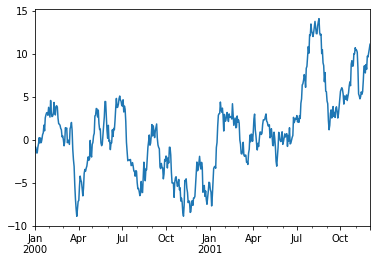

In [86]:
cbh = pd.offsets.CustomBusinessHour(start='06:00', end='16:00', weekmask='Mon Tue Wed Thu Fri Sat')
day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)
index = pd.date_range(start='2000-01-01',periods=500,freq='B')
ts = pd.Series(np.random.randn(len(index)),index=index)
walk = ts.cumsum()
walk.plot()

In [87]:
ts['2000-01-03':'2000-01-06']

2000-01-03   -0.768429
2000-01-04   -0.136832
2000-01-05   -0.598749
2000-01-06   -0.009577
Freq: B, dtype: float64

#### Downsampling

In [88]:
rng = pd.date_range('4/29/2015 8:00', periods=600, freq='T')
ts = pd.Series(np.random.randint(0,100, len(rng)), index=rng)
ts.head()

2015-04-29 08:00:00    49
2015-04-29 08:01:00     6
2015-04-29 08:02:00    45
2015-04-29 08:03:00    85
2015-04-29 08:04:00    68
Freq: T, dtype: int32

In [90]:
ts.resample('10min').sum()

2015-04-29 08:00:00    499
2015-04-29 08:10:00    600
2015-04-29 08:20:00    371
2015-04-29 08:30:00    566
2015-04-29 08:40:00    553
2015-04-29 08:50:00    539
2015-04-29 09:00:00    403
2015-04-29 09:10:00    449
2015-04-29 09:20:00    568
2015-04-29 09:30:00    381
2015-04-29 09:40:00    495
2015-04-29 09:50:00    665
2015-04-29 10:00:00    415
2015-04-29 10:10:00    556
2015-04-29 10:20:00    500
2015-04-29 10:30:00    446
2015-04-29 10:40:00    391
2015-04-29 10:50:00    519
2015-04-29 11:00:00    538
2015-04-29 11:10:00    509
2015-04-29 11:20:00    547
2015-04-29 11:30:00    590
2015-04-29 11:40:00    448
2015-04-29 11:50:00    436
2015-04-29 12:00:00    484
2015-04-29 12:10:00    524
2015-04-29 12:20:00    400
2015-04-29 12:30:00    649
2015-04-29 12:40:00    484
2015-04-29 12:50:00    547
2015-04-29 13:00:00    529
2015-04-29 13:10:00    467
2015-04-29 13:20:00    580
2015-04-29 13:30:00    390
2015-04-29 13:40:00    603
2015-04-29 13:50:00    471
2015-04-29 14:00:00    459
2

#### Upsampling

In [91]:
rng = pd.date_range('4/29/2015 8:00', periods=10, freq='H')
ts = pd.Series(np.random.randint(0,100, len(rng)), index=rng)

In [92]:
ts.resample('15min').first().head(10)

2015-04-29 08:00:00    97.0
2015-04-29 08:15:00     NaN
2015-04-29 08:30:00     NaN
2015-04-29 08:45:00     NaN
2015-04-29 09:00:00    41.0
2015-04-29 09:15:00     NaN
2015-04-29 09:30:00     NaN
2015-04-29 09:45:00     NaN
2015-04-29 10:00:00    56.0
2015-04-29 10:15:00     NaN
Freq: 15T, dtype: float64

In [93]:
ts.resample('15min').interpolate().head(10)

2015-04-29 08:00:00    97.00
2015-04-29 08:15:00    83.00
2015-04-29 08:30:00    69.00
2015-04-29 08:45:00    55.00
2015-04-29 09:00:00    41.00
2015-04-29 09:15:00    44.75
2015-04-29 09:30:00    48.50
2015-04-29 09:45:00    52.25
2015-04-29 10:00:00    56.00
2015-04-29 10:15:00    55.50
Freq: 15T, dtype: float64

In [94]:
ts.resample('15min').bfill().head(10)

2015-04-29 08:00:00    97
2015-04-29 08:15:00    41
2015-04-29 08:30:00    41
2015-04-29 08:45:00    41
2015-04-29 09:00:00    41
2015-04-29 09:15:00    56
2015-04-29 09:30:00    56
2015-04-29 09:45:00    56
2015-04-29 10:00:00    56
2015-04-29 10:15:00    54
Freq: 15T, dtype: int32

In [95]:
ts.resample('15min').ffill(limit=2).head(10)

2015-04-29 08:00:00    97.0
2015-04-29 08:15:00    97.0
2015-04-29 08:30:00    97.0
2015-04-29 08:45:00     NaN
2015-04-29 09:00:00    41.0
2015-04-29 09:15:00    41.0
2015-04-29 09:30:00    41.0
2015-04-29 09:45:00     NaN
2015-04-29 10:00:00    56.0
2015-04-29 10:15:00    56.0
Freq: 15T, dtype: float64

#### Zona horaria y time deltas

In [100]:
tz1 = pytz.timezone('Europe/London')
tz2 = pytz.timezone('America/Bogota')
time = pd.date_range('1/1/2021 00:00', periods=10, tz=tz1)
time2 = time.tz_convert(tz2)

In [98]:
time

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-02 00:00:00+00:00',
               '2021-01-03 00:00:00+00:00', '2021-01-04 00:00:00+00:00',
               '2021-01-05 00:00:00+00:00', '2021-01-06 00:00:00+00:00',
               '2021-01-07 00:00:00+00:00', '2021-01-08 00:00:00+00:00',
               '2021-01-09 00:00:00+00:00', '2021-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

In [405]:
time2

DatetimeIndex(['2020-12-31 19:00:00-05:00', '2021-01-01 19:00:00-05:00',
               '2021-01-02 19:00:00-05:00', '2021-01-03 19:00:00-05:00',
               '2021-01-04 19:00:00-05:00', '2021-01-05 19:00:00-05:00',
               '2021-01-06 19:00:00-05:00', '2021-01-07 19:00:00-05:00',
               '2021-01-08 19:00:00-05:00', '2021-01-09 19:00:00-05:00'],
              dtype='datetime64[ns, America/Bogota]', freq='D')

In [104]:
time[2]-time2[1]+time2[3]

Timestamp('2021-01-04 19:00:00-0500', tz='America/Bogota', freq='D')

In [106]:
td = pd.Timedelta('1day 2 hour 4min 8s 34us')
time2[0]+td

Timestamp('2021-01-01 21:04:08.000034-0500', tz='America/Bogota', freq='D')

In [108]:
pd.to_timedelta(np.arange(7), unit='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00'],
               dtype='timedelta64[ns]', freq=None)

### Importando y manipulando DataFrames

#### CSV

In [2]:
import pandas as pd

In [3]:
covid = pd.read_csv('COVID19.csv')
covid.head()

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_6039/1708967008.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv('COVID19.csv')


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [5]:
covid.tail()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
5003972,1/11/2021 0:00:00,5004013,24/1/2021 0:00:00,23,CORDOBA,23001,MONTERIA,42,1,M,...,NaN,NaN,Activo,21/1/2021 0:00:00,NaN,4/2/2021 0:00:00,NaN,NaN,NaN,NaN
5003973,1/11/2021 0:00:00,5004014,16/1/2021 0:00:00,23,CORDOBA,23001,MONTERIA,88,1,F,...,NaN,NaN,Activo,13/1/2021 0:00:00,NaN,27/1/2021 0:00:00,NaN,NaN,NaN,NaN
5003974,1/11/2021 0:00:00,5004015,15/1/2021 0:00:00,23,CORDOBA,23001,MONTERIA,22,1,M,...,NaN,NaN,Activo,12/1/2021 0:00:00,NaN,26/1/2021 0:00:00,NaN,NaN,NaN,NaN
5003975,1/11/2021 0:00:00,5004016,14/1/2021 0:00:00,23,CORDOBA,23001,MONTERIA,54,1,F,...,NaN,NaN,Activo,11/1/2021 0:00:00,NaN,25/1/2021 0:00:00,NaN,NaN,NaN,NaN
5003976,1/11/2021 0:00:00,5004017,13/1/2021 0:00:00,23,CORDOBA,23001,MONTERIA,63,1,F,...,NaN,NaN,Activo,10/1/2021 0:00:00,NaN,24/1/2021 0:00:00,NaN,NaN,NaN,NaN


In [9]:
covid.info(null_counts=True)

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_72749/2606739618.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  covid.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003977 entries, 0 to 5003976
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             5003977 non-null  object 
 1   ID de caso                    5003977 non-null  int64  
 2   Fecha de notificación         5003977 non-null  object 
 3   Código DIVIPOLA departamento  5003977 non-null  int64  
 4   Nombre departamento           5003977 non-null  object 
 5   Código DIVIPOLA municipio     5003977 non-null  int64  
 6   Nombre municipio              5003977 non-null  object 
 7   Edad                          5003977 non-null  int64  
 8   Unidad de medida de edad      5003977 non-null  int64  
 9   Sexo                          5003977 non-null  object 
 10  Tipo de contagio              5003977 non-null  object 
 11  Ubicación del caso            4984005 non-null  object 
 12  Estado                      

In [10]:
covid.describe()

,ID de caso,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Edad,Unidad de medida de edad,Código ISO del país,Pertenencia étnica
count,5.003977e+06,5.003977e+06,5.003977e+06,5.003977e+06,5.003977e+06,3140.000000,4.997444e+06
mean,2.502029e+06,1.327586e+03,2.827735e+04,3.950413e+01,1.003588e+00,594.338854,5.905555e+00
std,1.444524e+06,5.942108e+03,2.610482e+04,1.795638e+01,6.500582e-02,287.720892,6.089527e-01
min,1.000000e+00,5.000000e+00,5.001000e+03,1.000000e+00,1.000000e+00,4.000000,1.000000e+00
25%,1.251035e+06,1.100000e+01,1.100100e+04,2.600000e+01,1.000000e+00,380.000000,6.000000e+00
50%,2.502029e+06,1.700000e+01,1.100100e+04,3.700000e+01,1.000000e+00,724.000000,6.000000e+00
75%,3.753023e+06,6.800000e+01,5.000600e+04,5.200000e+01,1.000000e+00,840.000000,6.000000e+00
max,5.004017e+06,4.700100e+04,9.977300e+04,1.160000e+02,3.000000e+00,1724.000000,6.000000e+00


In [20]:
covid.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [6]:
import numpy as np
covid["Nombre municipio"]

0            BOGOTA
1              BUGA
2          MEDELLIN
3          MEDELLIN
4          MEDELLIN
             ...   
5003972    MONTERIA
5003973    MONTERIA
5003974    MONTERIA
5003975    MONTERIA
5003976    MONTERIA
Name: Nombre municipio, Length: 5003977, dtype: object

In [9]:
covid["Nombre municipio"] = covid["Nombre municipio"].apply(lambda x:x.upper())

In [61]:
import numpy as np
municipios=covid[covid.columns[(covid.dtypes==np.object)]]["Nombre municipio"].value_counts()
for i in municipios.index:
    print(i)

BOGOTA
MEDELLIN
CALI
BARRANQUILLA
CARTAGENA
BUCARAMANGA
IBAGUE
MANIZALES
SANTA MARTA
BELLO
VILLAVICENCIO
VALLEDUPAR
SOLEDAD
PEREIRA
CUCUTA
NEIVA
MONTERIA
SOACHA
PASTO
ITAGUI
ARMENIA
SINCELEJO
POPAYAN
FLORIDABLANCA
ENVIGADO
TUNJA
RIONEGRO
BARRANCABERMEJA
PALMIRA
CHIA
YOPAL
ZIPAQUIRA
SOGAMOSO
RIOHACHA
DOSQUEBRADAS
DUITAMA
FLORENCIA
FUSAGASUGA
TULUA
PIEDECUESTA
CALDAS
GIRARDOT
GIRON
MOSQUERA
CAJICA
FACATATIVA
APARTADO
FUNZA
SABANETA
MADRID
BUGA
CARTAGO
QUIBDO
SABANALARGA
BUENAVENTURA
PITALITO
JAMUNDI
MAGANGUE
MALAMBO
IPIALES
COPACABANA
MAICAO
BARANOA
YUMBO
LOS PATIOS
OCAÑA
ACACIAS
SAN ANDRES
CERETE
CHIQUINQUIRA
LA ESTRELLA
CIENAGA
SAN GIL
GALAPA
ARAUCA
VILLAMARIA
MARINILLA
VILLA DEL ROSARIO
LETICIA
PUERTO COLOMBIA
LA CEJA
SAHAGUN
ESPINAL
LA UNION
LA DORADA
CAUCASIA
SANTA ROSA DE CABAL
AGUACHICA
LORICA
TOCANCIPA
CALARCA
GUARNE
TUMACO
PAMPLONA
BARBOSA
UBATE
CARMEN DE VIBORAL
MOCOA
VILLANUEVA
CANDELARIA
COROZAL
GRANADA
PUERTO GAITAN
GARZON
SANTANDER DE QUILICHAO
CHINCHINA
SAN JOSE DEL GUAVIA

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_72749/2852739346.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  municipios=covid[covid.columns[(covid.dtypes==np.object)]]["Nombre municipio"].value_counts()


In [10]:
covid[covid.columns[(covid.dtypes==np.object)]]['Sexo'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2904\191262551.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covid[covid.columns[(covid.dtypes==np.object)]]['Sexo'].value_counts()


F    2626882
M    2377084
m          6
f          5
Name: Sexo, dtype: int64

In [11]:
covid[covid.columns[(covid.dtypes==np.object)]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_2904\1316097313.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covid[covid.columns[(covid.dtypes==np.object)]]


,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Nombre del grupo étnico
0,6/3/2020 0:00:00,2/3/2020 0:00:00,BOGOTA,BOGOTA,F,Importado,Casa,Leve,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,NaN
1,9/3/2020 0:00:00,6/3/2020 0:00:00,VALLE,BUGA,M,Importado,Casa,Leve,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,NaN
2,9/3/2020 0:00:00,7/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,F,Importado,Casa,Leve,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,NaN
3,11/3/2020 0:00:00,9/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,M,Relacionado,Casa,Leve,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,NaN
4,11/3/2020 0:00:00,9/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,M,Relacionado,Casa,Leve,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003972,1/11/2021 0:00:00,24/1/2021 0:00:00,CORDOBA,MONTERIA,M,En estudio,Casa,Leve,NaN,Activo,21/1/2021 0:00:00,NaN,4/2/2021 0:00:00,NaN,NaN,NaN
5003973,1/11/2021 0:00:00,16/1/2021 0:00:00,CORDOBA,MONTERIA,F,En estudio,Casa,Leve,NaN,Activo,13/1/2021 0:00:00,NaN,27/1/2021 0:00:00,NaN,NaN,NaN
5003974,1/11/2021 0:00:00,15/1/2021 0:00:00,CORDOBA,MONTERIA,M,En estudio,Casa,Leve,NaN,Activo,12/1/2021 0:00:00,NaN,26/1/2021 0:00:00,NaN,NaN,NaN
5003975,1/11/2021 0:00:00,14/1/2021 0:00:00,CORDOBA,MONTERIA,F,En estudio,Casa,Leve,NaN,Activo,11/1/2021 0:00:00,NaN,25/1/2021 0:00:00,NaN,NaN,NaN


In [50]:
covid[covid.columns[(covid.dtypes==float)|(covid.dtypes==int)]]

,ID de caso,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Edad,Unidad de medida de edad,Código ISO del país,Pertenencia étnica
0,1,11,11001,19,1,380.0,6.0
1,2,76,76111,34,1,724.0,5.0
2,3,5,5001,50,1,724.0,6.0
3,4,5,5001,55,1,NaN,6.0
4,5,5,5001,25,1,NaN,6.0
...,...,...,...,...,...,...,...
5003972,5004013,23,23001,42,1,NaN,NaN
5003973,5004014,23,23001,88,1,NaN,NaN
5003974,5004015,23,23001,22,1,NaN,NaN
5003975,5004016,23,23001,54,1,NaN,NaN


Requiere un archivo Json2.json guardado en el mismo directorio que contenga: [{"writer": "Mark Ross",
"nationality": "USA",
"books": [
{"title": "XML Cookbook", "price": 23.56},
{"title": "Python Fundamentals", "price": 50.70},
{"title": "The NumPy library", "price": 12.30}
]
},{"writer": "Barbara Bracket",
"nationality": "UK",
"books": [
{"title": "Java Enterprise", "price": 28.60},
{"title": "HTML5", "price": 31.35},
{"title": "Python for Dummies", "price": 28.00}
]
}]

#### json

In [417]:
file = open('Json2.json','r')
text = file.read()
text = json.loads(text)
text

[{'writer': 'Mark Ross',
  'nationality': 'USA',
  'books': [{'title': 'XML Cookbook', 'price': 23.56},
   {'title': 'Python Fundamentals', 'price': 50.7},
   {'title': 'The NumPy library', 'price': 12.3}]},
 {'writer': 'Barbara Bracket',
  'nationality': 'UK',
  'books': [{'title': 'Java Enterprise', 'price': 28.6},
   {'title': 'HTML5', 'price': 31.35},
   {'title': 'Python for Dummies', 'price': 28.0}]}]

In [419]:
json_normalize(text,'books',['nationality','writer'])

C:\Users\hola-\AppData\Local\Temp\ipykernel_4688\3284362935.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(text,'books',['nationality','writer'])


,title,price,nationality,writer
0,XML Cookbook,23.56,USA,Mark Ross
1,Python Fundamentals,50.70,USA,Mark Ross
2,The NumPy library,12.30,USA,Mark Ross
3,Java Enterprise,28.60,UK,Barbara Bracket
4,HTML5,31.35,UK,Barbara Bracket
5,Python for Dummies,28.00,UK,Barbara Bracket


Requiere un archivo Json2.json guardado en el mismo directorio que contenga: {"up":{"white":0,"black":4,"red":8,"blue":12},"down":{"white":1,"black":5,
"red":9,"blue":13},"right":{"white":2,"black":6,"red":10,"blue":14},
"left":{"white":3,"black":7,"red":11,"blue":15}}

In [421]:
pd.read_json('Json1.json')

,up,down,right,left
white,0,1,2,3
black,4,5,6,7
red,8,9,10,11
blue,12,13,14,15


#### Archivos hdf5

In [425]:
frame = pd.DataFrame(np.arange(16).reshape(4,4), index=['white','black','red','blue'], columns=['up','down','right','left'])
store = HDFStore('mydata.h5')
store['obj1'] = frame
store['obj2'] = frame
store.close()
prueba = pd.read_hdf('mydata.h5','obj1')
prueba

,up,down,right,left
white,0,1,2,3
black,4,5,6,7
red,8,9,10,11
blue,12,13,14,15


In [2]:
import pandas as pd

df = pd.DataFrame({"EEE": (37, 41, 43),
                    "FFF": (47, 53, 59)})

df.to_excel("prueba.xlsx")

In [6]:
import os
os.getcwd()
#os.listdir()

'/Users/itnas/Documents/UQ/Fisica computacional I/Codigos/Clase_Pandas'

In [11]:
import pandas as pd
from pandas import ExcelWriter


df1 = pd.DataFrame({"AAA": (1, 2, 3),
                    "BBB": (5, 7, 11)})

df2 = pd.DataFrame({"CCC": (13,17, 19),
                    "DDe": (23,29, 31)})

with ExcelWriter('prueba.xlsx') as writer:
    df1.to_excel(writer, 'INTRO',index=False)
    df2.to_excel(writer, 'DF_SHEET3',index=False)